# Machine Learning Pretest
## First Part: Multiple Choices
## https://goo.gl/forms/L3L2RH9NMQtGPe4I2

## Second Part: Coding Exercise

## Exercise 1
### Simulate N coin flips and count number of head and number of tail

In [15]:
def simulate_coin_flips(N, p):
    """
    return (number of head, number of tail)
    """
    import random
    head_count = 0
    for i in range(N):
        rand = random.uniform(0, 1)
        head_count += 1 if rand < p else 0
    
    return (head_count, N-head_count)

## Exercise 2
### Write a program to simulate data and answer this question: How many coin flips on average does it take to get n consecutive heads?

In [27]:
def average_coin_flips_until_n_heads(n, p):
    """
    return the answer
    """
    import random 
    
    N = 2000000
    count_sum = 0
    
    def test(n, p):
        head_count = 0
        i = 1
        while(True):
            rand = random.uniform(0, 1)
            head_count += 1 if rand < p else 0

            if head_count == n:
                return i
            
            i += 1
            
    for i in range(N):
        count_sum += test(n, p)
        
    return count_sum/N

2.0014185

## Exercise 3
### Fit linear regression on the simulated data below and show that the fitted parameters are correct

In [28]:
import numpy as np

x = np.random.normal(size=(100,2))
y = 4 + 3 * x[:,0] + 5 * x[:,1]

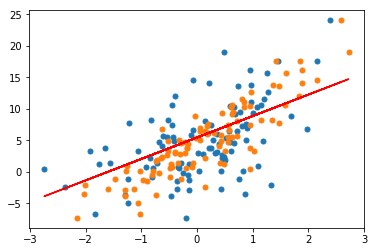

In [82]:
"""
YOUR CODE HERE
"""
# y = ax + b

a, b = np.linalg.lstsq(x, y)[0]

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Original data', markersize=5)
plt.plot(x, a*x + b, 'r', label='Fitted line')
plt.show()


## Exercise 4
### Given credit card fraud data below, fit a classification model on the trainData and evaluate the model on the testData using Area under curve of ROC (AUC) as a metric
### The label column is "Class" and other columns are anonymized features
### The data is sample from this dataset: https://www.kaggle.com/dalpozz/creditcardfraud

In [31]:
import pandas as pd

In [32]:
trainData = pd.read_csv("trainData.csv")

In [67]:
testData = pd.read_csv("testData.csv")
testData['Class'].values
testData.drop('Class', axis=1).values

array([[  7.98510000e+04,  -6.99148703e-01,   8.66465720e-01, ...,
         -1.86386366e-01,  -1.62854814e-01,   1.98000000e+00],
       [  2.82010000e+04,  -4.46041731e-01,   7.01825587e-01, ...,
         -7.14128215e-02,  -1.45321435e-01,   1.59600000e+01],
       [  4.07650000e+04,  -6.36142005e-01,   1.28420052e+00, ...,
          3.70648939e-02,   5.41888016e-02,   1.49000000e+00],
       ..., 
       [  9.38530000e+04,  -6.18585748e+00,   7.10298492e+00, ...,
         -2.03917328e-01,   3.98927186e-01,   4.49000000e+01],
       [  1.25612000e+05,   1.88961791e+00,   1.07309853e+00, ...,
          3.16687807e-02,   3.58833226e-02,   3.22000000e+00],
       [  3.55850000e+04,  -2.01900072e+00,   1.49126973e+00, ...,
          6.26282771e-01,   1.52439938e-01,   7.60000000e-01]])

In [90]:
"""
YOUR CODE HERE
"""
import numpy as np
from sklearn import metrics, tree

train_target = trainData['Class'].values.reshape(-1, 1)
train_features = trainData.drop('Class', axis=1).values

test_target = testData['Class'].values.reshape(-1, 1)
test_features = testData.drop('Class', axis=1).values

classifier = tree.DecisionTreeClassifier()
classifier.fit(train_features, train_target)

predicts = classifier.predict(test_features)
fpr, tpr, thresholds = metrics.roc_curve(test_target, predicts)
metrics.auc(fpr, tpr)

0.97549999999999992